In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class k_arm_eplison:
    
    def __init__(self, k, u, initial=0):
        self.k = k
        self.q = [initial for i in range(k)]
        self.num = [0 for i in range(k)]
        self.avg = []
        self.u = u
    
    def train(self, eplison, steps=2000):
        r = 0
        for i in range(steps):
            #choose action
            prob = np.random.uniform(0, 1)
            if prob < eplison:
                j = random.randint(0, self.k - 1)
            else:
                j = np.argmax(self.q)
            #immediate reward
            v = np.random.normal(self.u[j], 1.0)
            self.num[j] += 1
            self.q[j] += (v - self.q[j]) / self.num[j]
            # average reward
            r += v
            self.avg.append(r / (i + 1))
            
    def reset(self):
        self.__init__()

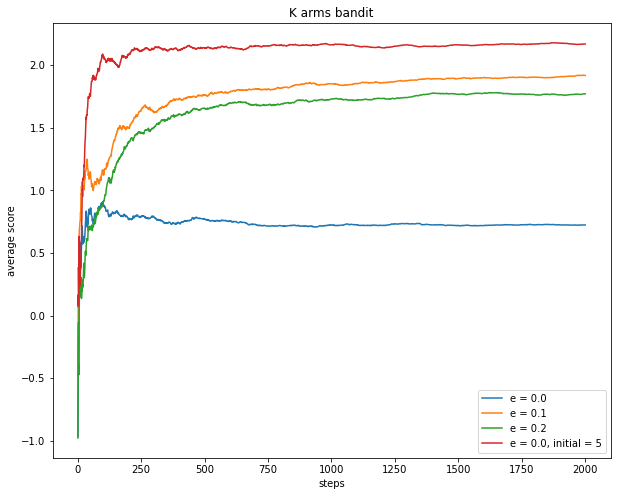

real mean of k arms bandit: 0.301538494


In [20]:
if __name__ == '__main__':
    
    k = 10
    u = np.random.normal(0.0, 1.0, k)
    
    m1 = k_arm_eplison(k, u)
    m1.train(0.0)

    m2 = k_arm_eplison(k, u)
    m2.train(0.1)

    m3 = k_arm_eplison(k, u)
    m3.train(0.2)
    
    m4 = k_arm_eplison(k, u, 5)
    m4.train(0.0)
    
    fig, ax = plt.subplots(figsize=(10, 8)) # 创建图实例
    x = np.arange(1, 2001)
    ax.plot(x, m1.avg, label='e = 0.0') 
    ax.plot(x, m2.avg, label='e = 0.1') 
    ax.plot(x, m3.avg, label='e = 0.2') 
    ax.plot(x, m4.avg, label='e = 0.0, initial = 5') 
    ax.set_xlabel('steps') 
    ax.set_ylabel('average score') 
    ax.set_title('K arms bandit') 
    ax.legend() 

    plt.show() 

    print('real mean of k arms bandit: {}'.format(np.mean(u)))